# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
tf. print(tf. __version__)

NameError: name 'tf' is not defined

In [3]:
!pip install tensorflow --user

In [69]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [52]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

ValueError: Cannot set memory growth on non-GPU and non-Pluggable devices

In [53]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Remove dodgy images

In [9]:
import cv2
import imghdr

In [10]:
data_dir = 'data' 

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [57]:
os.listdir(os.path.join(data_dir,'sad'))

['0x0.jpg',
 '1000_F_58495935_Nr9VzQljLyN3RKKhGDGxQDBEkqIeLzrZ.jpg',
 '280-2804580_sad-people-png-sad-person-png-transparent-png.png',
 '405-4050267_sad-people-png-sad-person-transparent-background-png.png',
 '504212.jpg',
 '51079685_M-1280x429.jpg',
 '51079685_M.jpg',
 '52672678._SX318_SY475_.jpg',
 '5360f7e3f9a01bb1aa10654514442436.500x500x1.jpg',
 '6-Best-and-worst-things-to-say.jpg',
 '73705bd7debb66c2afc780a22c223804.jpg',
 '766x415_Depression_vs_Sadness.jpg',
 '7RNXwSxCAKL8vGtXG2ZkyD.jpg',
 '8iAb9k4aT.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'AdobeStock_221688877-copy.jpg',
 'artworks-inq7uS3bz9CqNd3d-fqs6TA-t500x500.jpg',
 'artworks-pQBql6xWFe6JFOp4-FRtE5g-t500x500.jpg',
 'at-home-sad-sofa-300x200.jpg',
 'b11b520b0818895ae5563d1e70294052.jpg',
 'b2ap3_large_happy-sad-unsplash-850x575.jpg',
 'boy-with-head-down.jpg',
 'crying-at-work.jpg',
 'Crying-girl.jpg',
 'dark-depression-mood-people-wallpaper-preview.jpg',
 'DD-blogpost-SAD-940x492.png',
 'de2a0

In [63]:
for image_class in os.listdir(data_dir):
    print("---------------", image_class, "---------------********************************")
    for image in os.listdir(os.path.join(data_dir, image_class)):
        
        image_path = os.path.join(data_dir, image_class, image)
        print(image_path)

--------------- happy ---------------********************************
data\happy\05-12-21-happy-people.jpg
data\happy\07-120104-happy_people_are_not_nice_people.jpg
data\happy\1-2.jpg
data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
data\happy\11-Habits-of-Truly-Happy-People.jpg
data\happy\154006829.jpg
data\happy\170404-happy-workers-feature.jpg
data\happy\1902539.jpg
data\happy\1902540.jpg
data\happy\1902587.jpg
data\happy\1920px-face-smile.svg_.png.jpg
data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
data\happy\227-2271622_happy-people-business-team-celebrating-png.png
data\happy\60632274._UY200_.jpg
data\happy\7-Habits-of-Happy-People-image.jpeg
data\happy\7-principles-of-successful-and-happy-people.png
data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
data\happy\8cxKy5g9i.jpg
data\happy\960x0.jpg
data\happy\ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg
data\happy\A_Sep20_14_1189155141.jpg
data\happy\bigstock-Portrait-Of-Smiling-Employees-272904928-min-sc

limit_output extension: Maximum message size of 10000 exceeded with 10012 characters

In [73]:
type(image_path)

str

In [71]:
img = cv2.imread("data\sad\smiling-man-crowd-sad-people-vector-58533122.jpg")

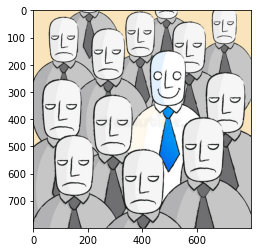

In [72]:
plt.imshow(img)

In [74]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [89]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

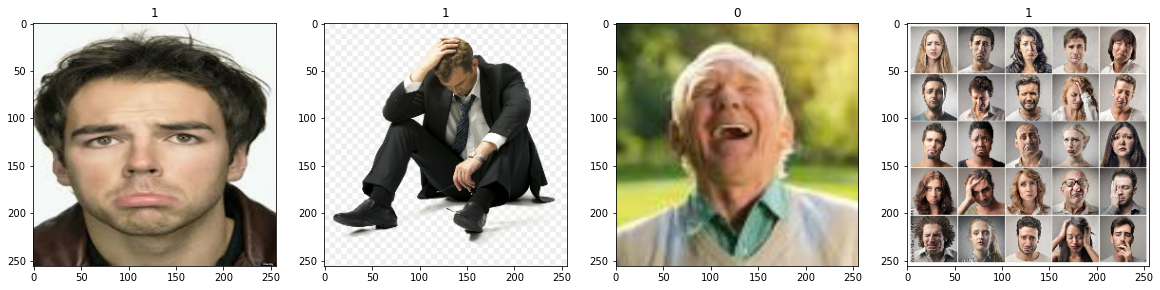

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
data.as_numpy_iterator().next()

(array([[[[0.9764706 , 0.95686275, 0.93333334],
          [0.9764706 , 0.95686275, 0.93333334],
          [0.9764706 , 0.95686275, 0.93333334],
          ...,
          [0.9647059 , 0.9529412 , 0.93333334],
          [0.9647059 , 0.9529412 , 0.93333334],
          [0.9647059 , 0.9529412 , 0.93333334]],
 
         [[0.9761336 , 0.95652574, 0.93299633],
          [0.9761046 , 0.9565547 , 0.93299633],
          [0.97597295, 0.9566863 , 0.93299633],
          ...,
          [0.9647059 , 0.9529412 , 0.93333334],
          [0.9647059 , 0.9529412 , 0.93333334],
          [0.9647059 , 0.9529412 , 0.93333334]],
 
         [[0.9746017 , 0.95499384, 0.93146443],
          [0.9744411 , 0.9551545 , 0.93146443],
          [0.9737111 , 0.9558845 , 0.93146443],
          ...,
          [0.9647059 , 0.9529412 , 0.93333334],
          [0.9647059 , 0.9529412 , 0.93333334],
          [0.9647059 , 0.9529412 , 0.93333334]],
 
         ...,
 
         [[0.09690563, 0.43844974, 0.60539216],
          [0.09565

limit_output extension: Maximum message size of 10000 exceeded with 11273 characters

# 5. Split Data

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [22]:
train_size

7

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [24]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 13s 2s/step - loss: 0.8988 - accuracy: 0.5312 - val_loss: 0.6295 - val_accuracy: 0.7344
Epoch 2/20
7/7 [==============================] - 12s 1s/step - loss: 0.6850 - accuracy: 0.6384 - val_loss: 0.6188 - val_accuracy: 0.7031
Epoch 3/20
7/7 [==============================] - 17s 2s/step - loss: 0.5745 - accuracy: 0.7366 - val_loss: 0.5473 - val_accuracy: 0.7500
Epoch 4/20
7/7 [==============================] - 15s 2s/step - loss: 0.5977 - accuracy: 0.7366 - val_loss: 0.6635 - val_accuracy: 0.6406
Epoch 5/20
7/7 [==============================] - 14s 2s/step - loss: 0.5350 - accuracy: 0.7277 - val_loss: 0.4998 - val_accuracy: 0.8438
Epoch 6/20
7/7 [==============================] - 14s 2s/step - loss: 0.4121 - accuracy: 0.8214 - val_loss: 0.4723 - val_accuracy: 0.8438
Epoch 7/20
7/7 [==============================] - 14s 2s/step - loss: 0.3987 - accuracy: 0.7991 - val_loss: 0.3606 - val_accuracy: 0.8438
Epoch 8/20
7/7 [==================

limit_output extension: Maximum message size of 10000 exceeded with 10152 characters

# 8. Plot Performance

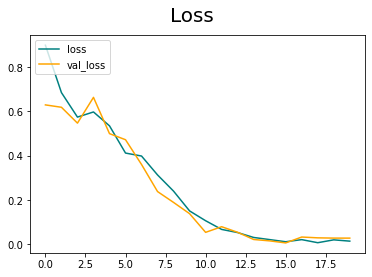

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

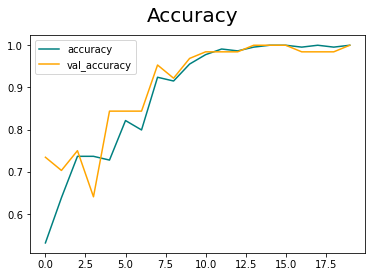

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 257ms/step


In [38]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [39]:
import cv2

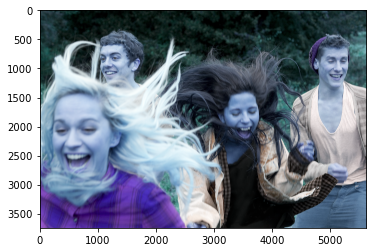

In [40]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

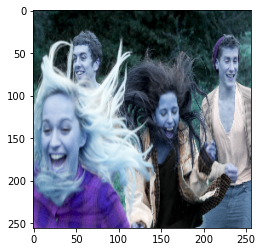

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 40ms/step


In [43]:
yhat

array([[0.2768305]], dtype=float32)

In [44]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [45]:
from tensorflow.keras.models import load_model

In [49]:
model.save(os.path.join('models','imageclassifier.h5'))

In [50]:
new_model = load_model('imageclassifier.h5')

OSError: No file or directory found at imageclassifier.h5

In [51]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'new_model' is not defined